In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

## Earth Orbit Simulation

This project simulates the trajectory calculation and visualization of a satellite in earth's orbit. The initial conditions are first set in the cell below, after which the equations of motion for satellite motion are derived and implemented in code to be solved by an ordinary differential equation (ODE) solver. The results are then showcased at the end.

This work was made possible referencing Zack Fixel's [code](https://towardsdatascience.com/use-python-to-create-two-body-orbits-a68aed78099c) implementation of the ODE as well as conceptual explanation and derivation from Alfonso Gonzalez's [video](https://www.youtube.com/watch?v=8-SyHZb7w40). I also referenced the [textbook](https://link.springer.com/book/9780792369035?utm_medium=referral&utm_source=google_books&utm_campaign=3_pier05_buy_print&utm_content=en_08082017) Fundamentals of Astrodynamics and Applications by D.A. Vallado.

In [2]:
# Earth parameters
mu_earth = 3.986004418E+05  #   [km^3/s^2]
rad_earth = 6371         #   [km]

# Satellite iniital position vector
x_0 = -2500 # [km]
y_0 = -5500 # [km]
z_0 = 3400  # [km]
pos_0 = [x_0, y_0, z_0]

# Satellite initial velocity vector
vx_0 = 7.5  # [km/s]
vy_0 = 0.0  # [km/s]
vz_0 = 4.0  # [km/s]
vel_0 = [vx_0, vy_0, vz_0]


# Time conditions
t_elapsed = 6*3600  #   [h] 
t_points = 250      #   number of time ponts
t = np.linspace(0, t_elapsed, t_points)

### Equations of Motion for Satellite Orbit

We start with Newton's law of universal gravitation to describe the gravitational force acting on the earth and the satellite

$$F=G\frac{{m_{Earth}}{m_{Sat}}}{{r^2}}$$

The standard gravitational parameter denoted by $mu$ of a celestial body is defined by the product of its mass and the gravitational constant, allowing the previous to be rewritten as

$$\mu=G*m_{Earth}$$
$$F=\frac{\mu_{Earth}{m_{Sat}}}{{r^2}}$$

Applying newton's second law of motion, the equation for acceleration experienced by the satellite as a result of the gravitational force may be written as

$$a=\frac{\mu_{Earth}}{{r^2}}$$

This may be rewritten in vector form as follows, where the acceleration is in the opposite direction of the position vector $\vec{r}$ from the earth to the satellite.

$$\vec{a}=-\frac{\mu_{Earth}}{{\lvert{\vec{r}}\lvert^3}}\vec{r}$$

This may be rewritten to determine $x,y,z$ components of the acceleration vector, the magnitude of the acceleration vector is given as follows

$$
\begin{align*}
{\vec{a_x}=-\frac{\mu_{Earth}}{{\lvert{\vec{r}}\lvert^3}}\vec{x}} &&
{\vec{a_y}=-\frac{\mu_{Earth}}{{\lvert{\vec{r}}\lvert^3}}\vec{y}} &&
{\vec{a_z}=-\frac{\mu_{Earth}}{{\lvert{\vec{r}}\lvert^3}}\vec{z}}
\end{align*}
$$

$${\lvert{\vec{r}}\lvert}=\sqrt{x^2+y^2+z^2}$$

In [3]:
"""
Satellite orbit motion model

param   t:                                                              (float) time step [s]
param   state = [x, y, z, x_dot, y_dot, z_dot]:                         (float array)

returns dtstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]:     (float array)

Do more work to understand the state matrix representation
https://space.stackexchange.com/questions/20590/how-to-best-think-of-the-state-transition-matrix-and-how-to-use-it-to-find-peri
"""
def satellite_motion_model(state, t):

    x = state[0]
    y = state[1]
    z = state[2]
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    x_ddot = -mu_earth * x / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    y_ddot = -mu_earth * y / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    z_ddot = -mu_earth * z / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

In [4]:
# Get trakectory from ODE solver

# Forming state array combining position and velocity vectors
# state = [x, y, z, x_dot, y_dot, z_dot]
state_0 = pos_0 + vel_0

sol = odeint(satellite_motion_model, state_0, t)

<IPython.core.display.Javascript object>


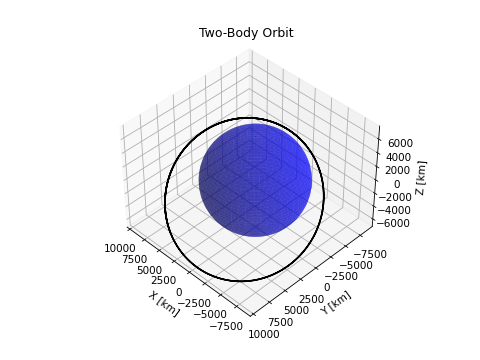

In [5]:
X_Sat = sol[:, 0]  # X-coord [km] of satellite over time interval 
Y_Sat = sol[:, 1]  # Y-coord [km] of satellite over time interval
Z_Sat = sol[:, 2]  # Z-coord [km] of satellite over time interval

# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Earth Model
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.5)
ax.plot3D(X_Sat, Y_Sat, Z_Sat, 'black')
ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')

# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),      
                   ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)
plt.show()